## Predicting TCS Stock Performace

In this jupyter notebook we will be training linear models for predicting TCS stock price based on 2016 trading data.

### Lets Get Data

Get the historic data of TCS scrip from [NSE](https://www.nseindia.com/products/content/equities/equities/eq_security.htm)
- choose Price, Volume and Delivery Position data as it provides insight into investors pulse
- Enter Symbol 'TCS' and select series equity 'EQ'
- Get data for past 365 days
- Click get data and then download full data

In [1]:
# load ammo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score

### Loading data into DataFrame
Assuming the downloaded data is in your current working directory, the dataset should have name like this **`01-01-2016-TO-30-12-2016TCSEQN.csv`**

In [2]:
# loading data sec_bhavdata_full.csv
# column name is present in data 
df = pd.read_csv('01-01-2016-TO-30-12-2016TCSEQN.csv')
print(df.shape)
df.dtypes

(247, 15)


Symbol                     object
Series                     object
Date                       object
Prev Close                float64
Open Price                float64
High Price                float64
Low Price                 float64
Last Price                float64
Close Price               float64
Average Price             float64
Total Traded Quantity       int64
Turnover in Lacs          float64
No. of Trades               int64
Deliverable Qty             int64
% Dly Qt to Traded Qty    float64
dtype: object

In [3]:
# let see what we got here
df.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover in Lacs,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000,247.000000,2.470000e+02,247.000000
mean,2419.522065,2418.992105,2442.333198,2392.198785,2419.567611,2419.233401,2417.921984,1.091715e+06,26337.458381,60466.882591,7.133274e+05,65.055506
std,139.226738,137.641631,136.705273,139.659422,138.700465,139.264575,137.672694,5.897982e+05,14181.076781,26322.564829,3.817986e+05,7.950901
min,2101.150000,2116.900000,2140.000000,2051.900000,2120.000000,2101.150000,2110.240000,4.267600e+04,1021.550000,3032.000000,1.707300e+04,40.010000
25%,2319.550000,2315.250000,2340.550000,2291.250000,2318.500000,2319.550000,2317.545000,7.268340e+05,17627.255000,43728.500000,4.482740e+05,59.905000
50%,2420.050000,2411.000000,2434.900000,2401.100000,2421.400000,2418.100000,2419.990000,9.394940e+05,22598.580000,54342.000000,6.150090e+05,64.730000
75%,2521.100000,2521.275000,2543.500000,2495.175000,2522.650000,2521.100000,2514.875000,1.241949e+06,30405.365000,70264.000000,8.483030e+05,71.515000
max,2738.450000,2738.000000,2744.800000,2702.050000,2740.000000,2738.450000,2732.860000,4.168183e+06,102712.190000,185897.000000,2.506173e+06,85.080000


TCS being largest company by market capitalization it maintains very high liquidity so we will have data for all the trading days of 2016.

In [4]:
df.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover in Lacs,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,01-Jan-2016,2436.85,2439.00,2439.0,2412.25,2414.1,2416.4,2423.73,356131,8631.65,15545,246115,69.11
1,TCS,EQ,04-Jan-2016,2416.40,2410.15,2414.0,2366.05,2373.0,2369.6,2381.76,935092,22271.61,72341,615009,65.77


In [5]:
df.tail(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover in Lacs,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
245,TCS,EQ,29-Dec-2016,2313.4,2303.0,2359.9,2303.00,2355.00,2351.70,2346.25,981758,23034.45,64945,575262,58.60
246,TCS,EQ,30-Dec-2016,2351.7,2354.9,2378.6,2345.65,2366.55,2365.55,2366.64,702874,16634.48,44979,456203,64.91


### Exploring dataset
Lets see how the scrip has performed over the year

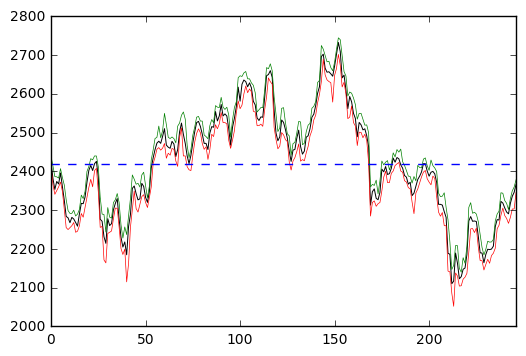

In [6]:
df['Average Price'].plot(color='black',linewidth=0.7)
df['High Price'].plot(color='green', linewidth=0.5)
df['Low Price'].plot(color='red', linewidth=0.5,)
plt.plot([df['Average Price'].mean()]*247, 'b--')
plt.show()

We see lot of swing in the price, the stock started & ended the year in the same range.

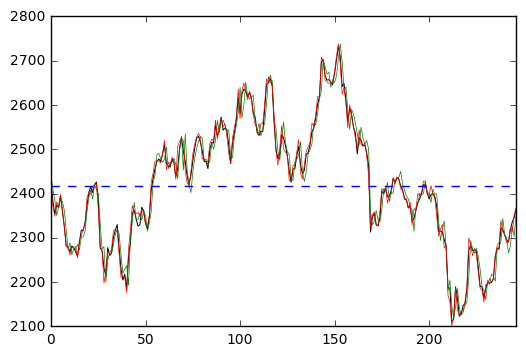

In [7]:
df['Average Price'].plot(color='black',linewidth=0.7)
df['Open Price'].plot(color='green', linewidth=0.5)
df['Close Price'].plot(color='red', linewidth=0.5,)
plt.plot([df['Average Price'].mean()]*247, 'b--')
plt.show()

### Feature Selection

Lets build a simple model based on **open**, **high**, **low**, **close** and **average price** features to pridect **next day average price**

In [8]:
# feature and label selection
features = ['Open Price','High Price','Low Price','Close Price','Average Price']
label = ['Average Price']

# prepare dataset with only required columns
# label is the avg. price shifted to next day
dataset = df[features].assign(label=df[label].shift(-1))

In [9]:
# lets check head of the dataset, now the label is previous days avg. price
dataset.head(5)

,Open Price,High Price,Low Price,Close Price,Average Price,label
0,2439.00,2439.00,2412.25,2416.40,2423.73,2381.76
1,2410.15,2414.00,2366.05,2369.60,2381.76,2353.54
2,2385.00,2386.60,2341.00,2348.95,2353.54,2374.18
3,2350.20,2386.15,2350.20,2381.60,2374.18,2367.71
4,2370.00,2382.90,2360.00,2371.25,2367.71,2396.08


In [10]:
# the last label is nan cause we shifted the label
dataset.tail(2)

,Open Price,High Price,Low Price,Close Price,Average Price,label
245,2303.0,2359.9,2303.00,2351.70,2346.25,2366.64
246,2354.9,2378.6,2345.65,2365.55,2366.64,NaN


In [11]:
# drop last datapoint as it lacks label
print(dataset.shape)
dataset.dropna(inplace=True)
print(dataset.shape)

(247, 6)
(246, 6)


### Preprocessing Data
we will scale the features for obvious performace upgrade

In [12]:
# separate data and target label
data = dataset[features].values
target = dataset['label'].values

# scale the dataset to ease model
data_scaled = preprocessing.scale(data)

### Train and Test Data
Split data into train and test, with train data representing 70%

In [13]:
test_size = 0.3 # hold out 30% for prediction
random_state = 42 # answer to the univers could be better choice :P

X_train, X_test, y_train, y_test = train_test_split(data_scaled,target,test_size=test_size,random_state=random_state)

X_train.shape, y_train.shape

((172, 5), (172,))

In [14]:
X_test.shape, y_test.shape

((74, 5), (74,))

### Model Selection 
Let us run this data through few linear models to compare their relative preformace. We will choose top two models

In [15]:
# lets use multiple models and determine their merit with kfold cross validation
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

models = []
models.append(('Linear Regression',LinearRegression()))
models.append(('SVR Linear',SVR(kernel='linear')))
models.append(('SVR Ploy',SVR(kernel='poly')))
models.append(('SVR RBF',SVR(kernel='rbf')))

### Cross Validation 
I tried cv with shuffling(by explicitly using KFold class) and without shuffling(by just passing cv=10), the models performed significantly worse when shuffled, mainly because this is a time series problem and we are not using the key feature `Date` which I'm saving it for later.

Model evaluation metric for out problem would be Mean Squard Error 

In [16]:
# lets evaluate models 
results = []
names = []
scoring = 'neg_mean_squared_error'

# kfold with shuffling
from sklearn.model_selection import KFold
num_splits = 10
kf = KFold(n_splits=num_splits,shuffle=True,random_state=random_state)

# kfold without shuffling
cv_fold = 10

# if you wish to try cv will shuffling pass kf to cv instead of sv_fold

for name, model in models:
    result = cross_val_score(model, X_train, y_train, cv=cv_fold,scoring=scoring)
    names.append(name)
    results.append(result)
    msg = "{:20} : mean = {:.5f}  std = {:.5f}".format(name,result.mean(),result.std())
    print(msg)

Linear Regression    : mean = -804.93089  std = 291.70783
SVR Linear           : mean = -985.02259  std = 325.78073
SVR Ploy             : mean = -5832.65408  std = 2263.04877
SVR RBF              : mean = -12455.62543  std = 3957.33056


### Comparing CV Score


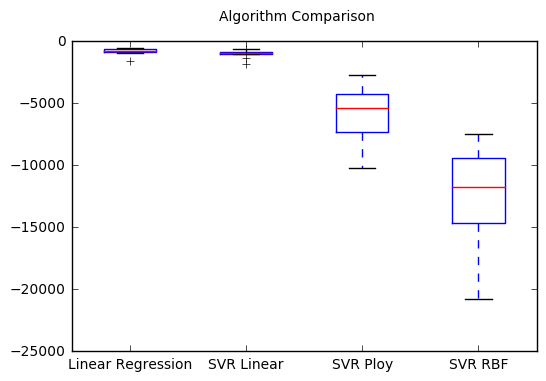

In [17]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

As we can see in the comparison `Linear Regressionand` and `SVR` with `Linear Kernel` have higest accuracy and very low deviation.
`SVR Poly` and `SVR RBF` are bad idea if you gonna put your money on this :P

### Choosing Final Models
I have set MSE threshold to -1000 which shoudl get us LR and SVR-Linear

In [18]:
# lets predict
accuracy_threshold = -1000
cv_models = []
cv_results = []
cv_names = []

for model,result in zip(models,results):
    if result.mean() > accuracy_threshold:
        cv_models.append(model)
        cv_results.append(result)
        cv_names.append(model[0])
        print('adding model... {}'.format(model[0]))

adding model... Linear Regression
adding model... SVR Linear


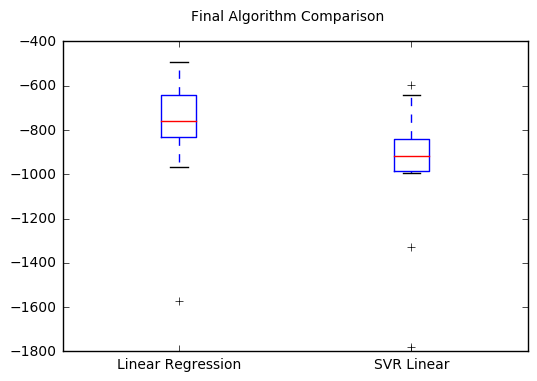

In [19]:
# lets have a closer look at the 'relatively' good models
fig = plt.figure()
fig.suptitle('Final Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(cv_results)
ax.set_xticklabels(cv_names)
plt.show()

there are some outlies but the inter quartail range is short (compared to the one trained on shuffled features)

### Predicting Test Set

In [20]:
# make prediction on test set
from sklearn.metrics import mean_squared_error
predictions = []
mseResult = []
for name,model in cv_models:
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    predictions.append(prediction)
    mse = mean_squared_error(y_test,prediction)
    mseResult.append(mse)
    msg = "{:20} : mae = {:.5f}".format(name,mse)
    print(msg)

Linear Regression    : mae = 867.23876
SVR Linear           : mae = 1028.96210


The predicton MSE is in line with what we seen in cross validation 

In [21]:
df_predictions = pd.DataFrame(np.transpose(predictions),columns=['Linear Reg','SVR Linear'])
df_predictions = df_predictions.assign(y_test=y_test)
df_predictions.head()

,Linear Reg,SVR Linear,y_test
0,2317.573720,2303.110227,2317.45
1,2364.197795,2365.639535,2325.68
2,2427.973945,2422.513061,2423.88
3,2514.182910,2503.545917,2554.51
4,2625.602555,2629.699464,2610.69


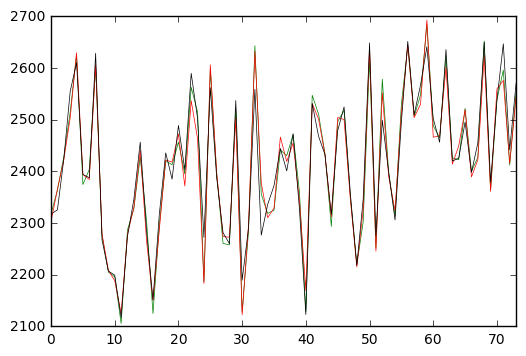

In [22]:
df_predictions['Linear Reg'].plot(color='green',linewidth=0.5)
df_predictions['SVR Linear'].plot(color='red', linewidth=0.5)
df_predictions['y_test'].plot(color='black', linewidth=0.5,)
plt.show()

We can see the Linear Regression is tracing the acutal value more conservatively while SVR overshooting in most of the time

#### Thats all folks, will try out enseble later 